In [1]:
import pandas as pd
from oct_Utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties

font = FontProperties(fname='/home/octusr3/simhei.ttf', size=15)
file_path='/home/octusr3/project/oct/temp/data.csv'
data=pd.read_csv(file_path)


/home/octusr3/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
Duplicate key in file PosixPath('/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 260 ('font.family:  sans-serif')
Duplicate key in file PosixPath('/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 268 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 411 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


In [2]:

df_num = pd.read_csv(f'/home/octusr3/project/oct/temp/df4R_num_pdp.csv')
df_pred = pd.read_csv(f'/home/octusr3/project/oct/temp/df4R_pred_pdp.csv')

In [3]:
class_mapping = {
    0: 1,
    0.005: 1,
    0.01: 1,
    0.02: 1,
    0.05: 1,
    0.95: 0,
    0.98: 0,
    0.99: 0,
    0.995: 0,
    1: 0,
}
valid_cols = [f'l{i}' for i in range(1, 55)]
valid_cols.remove('l26')
valid_cols.remove('l35')
for col in valid_cols:
    df_num[col] = df_num[col].map(class_mapping)#计算分类错误点数
    df_pred[col] = df_pred[col].map(class_mapping)

In [4]:
bupt=pd.DataFrame()
temp={
    True:1,
    False:0
}
for col in valid_cols:#用来计算分类错误的点
    bupt[col]=df_num[col]!=df_pred[col]
    bupt[col]=bupt[col].map(temp)
bupt['Row_sum'] = bupt.apply(lambda x: x.sum(),axis=1)
data['Row_mistake_sum']=bupt['Row_sum']
data=data.sort_values(by='Row_mistake_sum',ascending=False).dropna(axis=0,how='any')
#test_data=data.sort_values(by='Row_mistake_sum',ascending=False).iloc[0:30]

In [5]:
test_data=data.sort_values(by='Row_mistake_sum',ascending=False).dropna(axis=0,how='any').iloc[[i for i in range(0,10)]+[j for j in range(data.shape[0]//2-10,data.shape[0]//2)]
+[k for k in range(data.shape[0]-11,data.shape[0]-1)]]#各取10条数据，组成新的数据


In [8]:
test_data

,image_path,source,pid,dates,eye,pos,num,pd_prob,dataset,pred,Row_mistake_sum
2626,20210730-中山眼科-OCT转VF/IG/CRC-022-0106/IG010045/...,IG,CRC-022-0106,2019-04-15,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[22.12048 22.409964 21.74281 21.871485...,42.0
2562,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-471/2019...,CASIA数据汇总-new,CS-471,2019-09-11,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[26.537838 26.798563 26.420284 26.31506 2...,42.0
11325,20210812-sysu-oct/ANGIO2/LBC-0275/20160412/OD/...,ANGIO2,LBC-0275,2016-04-12,OD,disc,[[ 0 0 0 8 12 11 21 0 0 0]\n [ 0 0 9 -...,[[0 0 0 4 3 3 1 0 0 0]\n [0 0 5 5 2 4 1 1 0 0]...,4,[24.119114 24.517614 24.121922 24.385477...,42.0
11324,20210812-sysu-oct/ANGIO2/CRC-016-049/20201120/...,ANGIO2,CRC-016-049,2020-11-20,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,4,[24.396486 24.956768 24.586847 24.84596 2...,42.0
2563,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-471/2019...,CASIA数据汇总-new,CS-471,2019-09-11,OS,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[27.46729 27.77346 27.298748 27.326702 2...,42.0
2480,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-225/2019...,CASIA数据汇总-new,CS-225,2019-06-17,OS,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[26.029835 26.401148 25.852104 25.951853 2...,41.0
2483,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-232/2019...,CASIA数据汇总-new,CS-232,2019-06-20,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 3...,1,[21.542711 21.924875 21.215246 21.541319...,41.0
691,20210812-sysu-oct/ANGIO2/RZH-0364/20180829/OD/...,ANGIO2,RZH-0364,2018-08-29,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,0,[24.975256 25.265686 24.948195 24.916828...,41.0
11326,20210812-sysu-oct/ANGIO2/LBC-0275/20160412/OS/...,ANGIO2,LBC-0275,2016-04-12,OS,disc,[[ 0 0 0 22 23 20 19 0 0 0]\n [ 0 0 18 2...,[[0 0 0 1 1 1 1 0 0 0]\n [0 0 2 2 1 1 1 1 0 0]...,4,[25.885065 26.269701 25.768442 25.992311 2...,41.0
11327,20210812-sysu-oct/ANGIO2/LBC-0275/20160711/OD/...,ANGIO2,LBC-0275,2016-07-11,OD,disc,[[ 0 0 0 28 25 23 25 0 0 0]\n [ 0 0 23 2...,[[0 0 0 1 1 1 1 0 0 0]\n [0 0 2 1 1 1 1 1 0 0]...,4,[25.142178 25.568773 25.055098 25.337654...,41.0


In [9]:
def fill_array(row):#现在用的都是正正常常的数据，经过重新组织过的数据，序列是对的上的\n",
        position_list=[(1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2),
         (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7),
        (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4),
        (6, 5), (6, 6), (6, 7), (6, 8), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 3), (8, 4), (8, 5), (8, 6)]
        temp_data=str_to_np_array(row['pred'])
        res=np.zeros((10,10))
        for i,j in zip(temp_data,position_list):
            res[j[0]][j[1]]=format(i, '.2f')#这里必须得保留小数,要是保留所有位数的话，会导致后面出误差，有值会丢失，就是因为前面留的数值太长了
        if row['eye']=='OS':
             res = np.flip(res, axis=1)  
        #print(res)
        return str(res)
test_data['pred_mat']=test_data.apply(fill_array,axis=1)#apply函数是否指定axis很讲究，差别很大

In [10]:
def construct_two_class_mat(row):
    position_list=[(1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2),
     (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7),
    (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), 
    (6, 5), (6, 6), (6, 7), (6, 8), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 3), (8, 4), (8, 5), (8, 6)]
    temp_data=[f'l{i}' for i in range(1, 55)]
    res=np.zeros((10,10))
    for i,j in zip(temp_data,position_list):
        res[j[0]][j[1]]=row[i]
    if row['eye']=='OS':
        res = np.flip(res, axis=1)
    return str(res)

In [11]:
test_data=test_data.join(df_num[[f'l{i}' for i in range(1, 55)]])#对数据join,增加分类结果
test_data['classification_num']=test_data.apply(construct_two_class_mat,axis=1)
test_data=test_data.drop([f'l{i}' for i in range(1, 55)],axis=1)
test_data=test_data.join(df_pred[[f'l{i}' for i in range(1, 55)]])
test_data['classification_pred']=test_data.apply(construct_two_class_mat,axis=1)
test_data=test_data.drop([f'l{i}' for i in range(1, 55)],axis=1)

In [12]:
test_data

,image_path,source,pid,dates,eye,pos,num,pd_prob,dataset,pred,Row_mistake_sum,pred_mat,classification_num,classification_pred
2626,20210730-中山眼科-OCT转VF/IG/CRC-022-0106/IG010045/...,IG,CRC-022-0106,2019-04-15,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[22.12048 22.409964 21.74281 21.871485...,42.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
2562,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-471/2019...,CASIA数据汇总-new,CS-471,2019-09-11,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[26.537838 26.798563 26.420284 26.31506 2...,42.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
11325,20210812-sysu-oct/ANGIO2/LBC-0275/20160412/OD/...,ANGIO2,LBC-0275,2016-04-12,OD,disc,[[ 0 0 0 8 12 11 21 0 0 0]\n [ 0 0 9 -...,[[0 0 0 4 3 3 1 0 0 0]\n [0 0 5 5 2 4 1 1 0 0]...,4,[24.119114 24.517614 24.121922 24.385477...,42.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
11324,20210812-sysu-oct/ANGIO2/CRC-016-049/20201120/...,ANGIO2,CRC-016-049,2020-11-20,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,4,[24.396486 24.956768 24.586847 24.84596 2...,42.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
2563,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-471/2019...,CASIA数据汇总-new,CS-471,2019-09-11,OS,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[27.46729 27.77346 27.298748 27.326702 2...,42.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
2480,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-225/2019...,CASIA数据汇总-new,CS-225,2019-06-17,OS,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[26.029835 26.401148 25.852104 25.951853 2...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
2483,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-232/2019...,CASIA数据汇总-new,CS-232,2019-06-20,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 3...,1,[21.542711 21.924875 21.215246 21.541319...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
691,20210812-sysu-oct/ANGIO2/RZH-0364/20180829/OD/...,ANGIO2,RZH-0364,2018-08-29,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,0,[24.975256 25.265686 24.948195 24.916828...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
11326,20210812-sysu-oct/ANGIO2/LBC-0275/20160412/OS/...,ANGIO2,LBC-0275,2016-04-12,OS,disc,[[ 0 0 0 22 23 20 19 0 0 0]\n [ 0 0 18 2...,[[0 0 0 1 1 1 1 0 0 0]\n [0 0 2 2 1 1 1 1 0 0]...,4,[25.885065 26.269701 25.768442 25.992311 2...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
11327,20210812-sysu-oct/ANGIO2/LBC-0275/20160711/OD/...,ANGIO2,LBC-0275,2016-07-11,OD,disc,[[ 0 0 0 28 25 23 25 0 0 0]\n [ 0 0 23 2...,[[0 0 0 1 1 1 1 0 0 0]\n [0 0 2 1 1 1 1 1 0 0]...,4,[25.142178 25.568773 25.055098 25.337654...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...


In [13]:
# def show_heatmap_of_results(test_data:pd.DataFrame):
#     draw_list= ['num', 'pred', 'classification_num','classification_pred']
#     fig,axes=plt.subplots(2,2,figsize=(10,10))
#     #plt.subplots_adjust(wspace=0.5)
#    # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
#     for i in range(2):
#         for j in range(2):
#             sns.heatmap(pd.DataFrame(str_to_np_mat(test_data.iloc[i][draw_list[j]])),cmap="Greys",annot=True,ax=axes[i][j])
#             #print(type(str_to_np_mat(test_data.iloc[i][draw_list[j]])))

def show_heatmap_of_results(data:pd.DataFrame,picture_save_path,show_id=0):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))
    ax=[ax1,ax2,ax3,ax4]
    draw_list= ['num', 'pred_mat', 'classification_num','classification_pred']
    for i,j in zip(draw_list,ax):
        if i=='num' or i=='pred_mat':
            sns.heatmap(pd.DataFrame(str_to_np_mat(test_data.iloc[show_id][i])),vmin=0,vmax=35,cmap="Greys_r",annot=True,fmt=".1f",ax=j)
        else:
            sns.heatmap(pd.DataFrame(str_to_np_mat(test_data.iloc[show_id][i])),cmap="Greys",annot=True,ax=j)
    plt.tight_layout()
    #plt.show()
    plt.savefig(picture_save_path+'/'+str(show_id)+'.jpg')


In [14]:
picture_save_path='/home/octusr3/project/oct/temp/picture'
#picture_save_path+'/'+str(3)+'.jpg'#存储一张图片的代码已经测试通过了
def save_results(data):
    for i in range(data.shape[0]):
        show_heatmap_of_results(data,picture_save_path,i)
    sys.exit()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei Mono
/home/octusr3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


SystemExit: 

/home/octusr3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


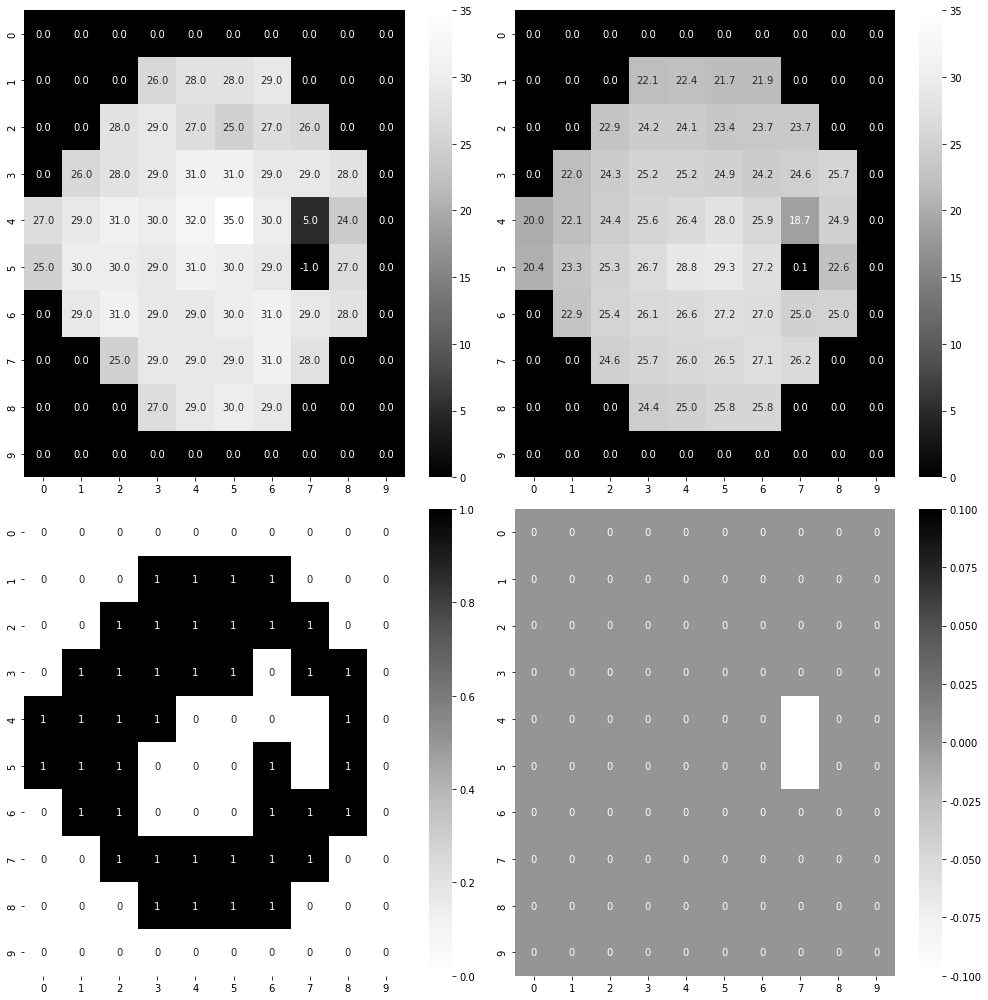

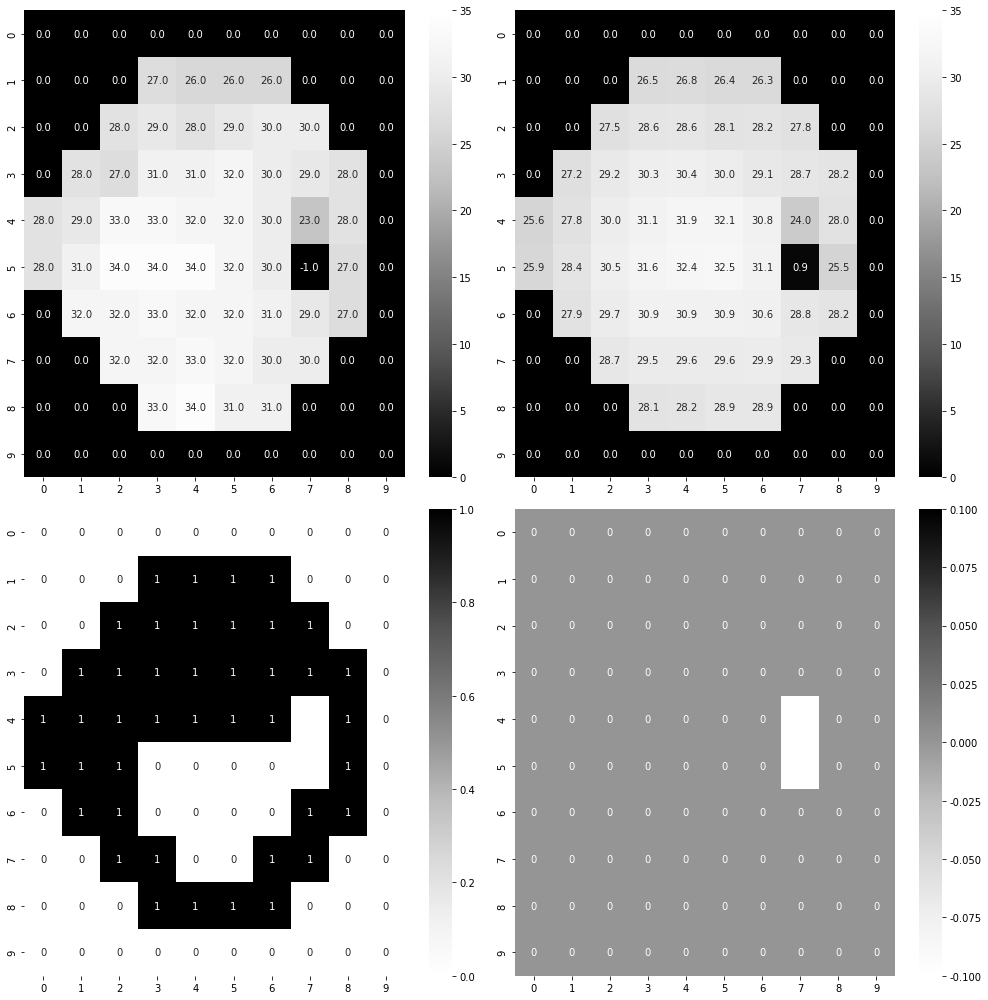

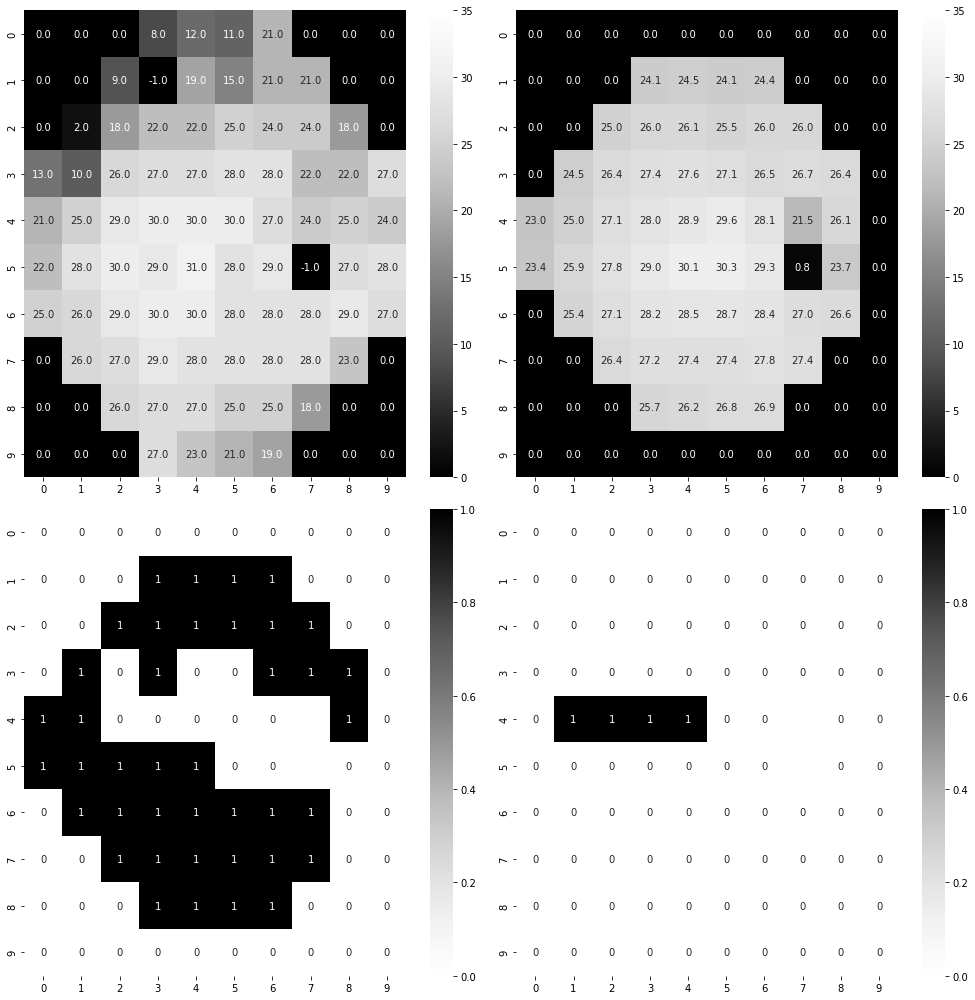

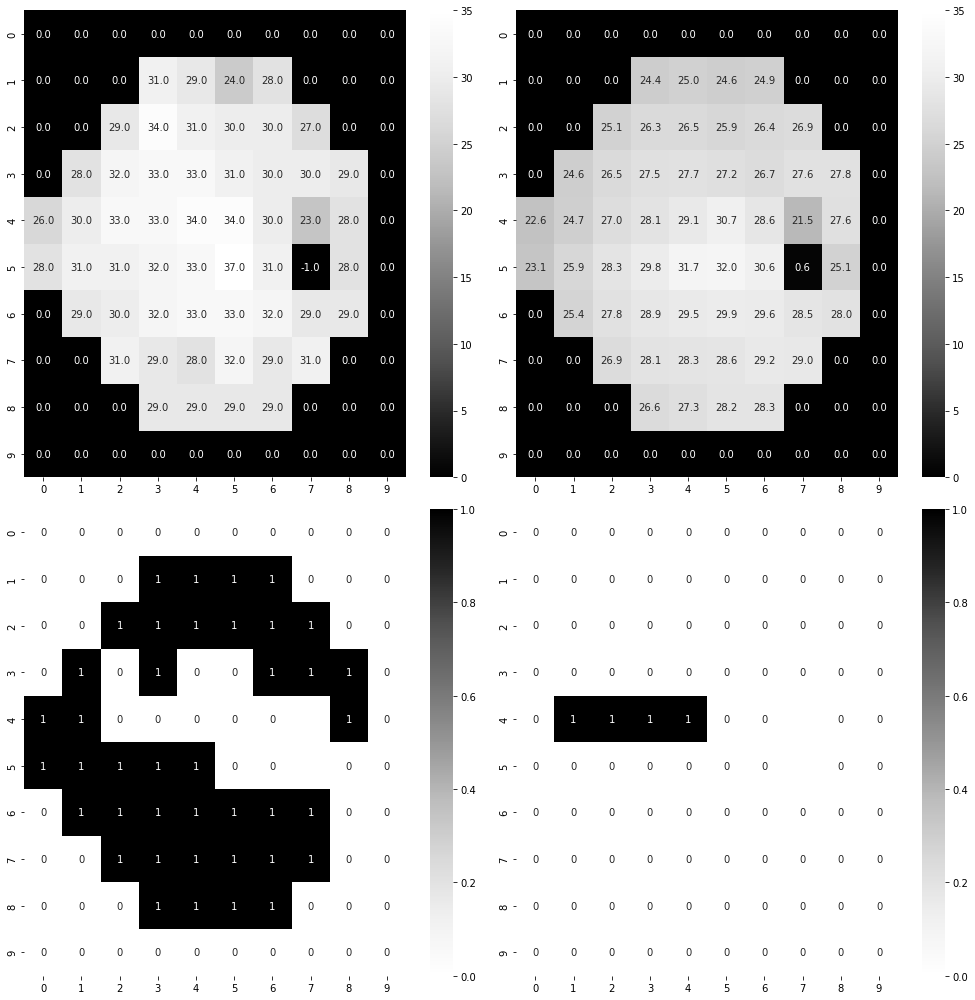

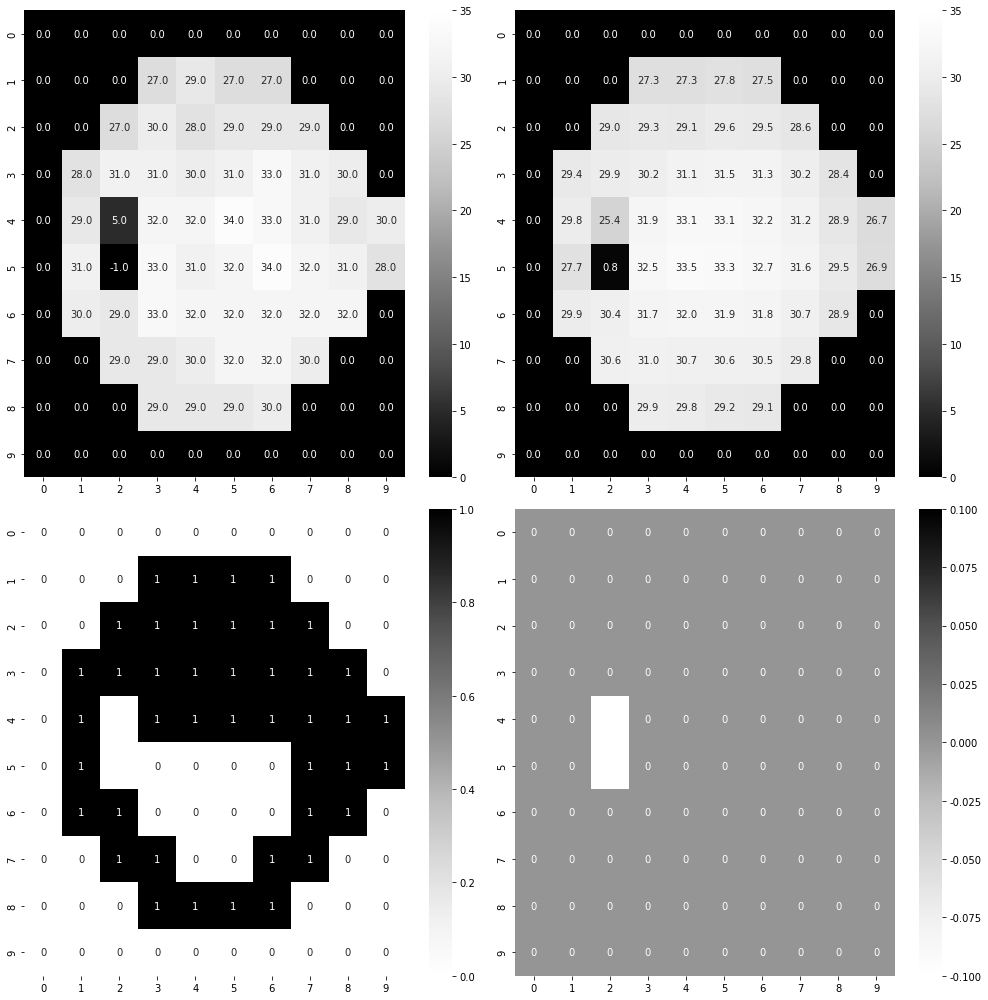

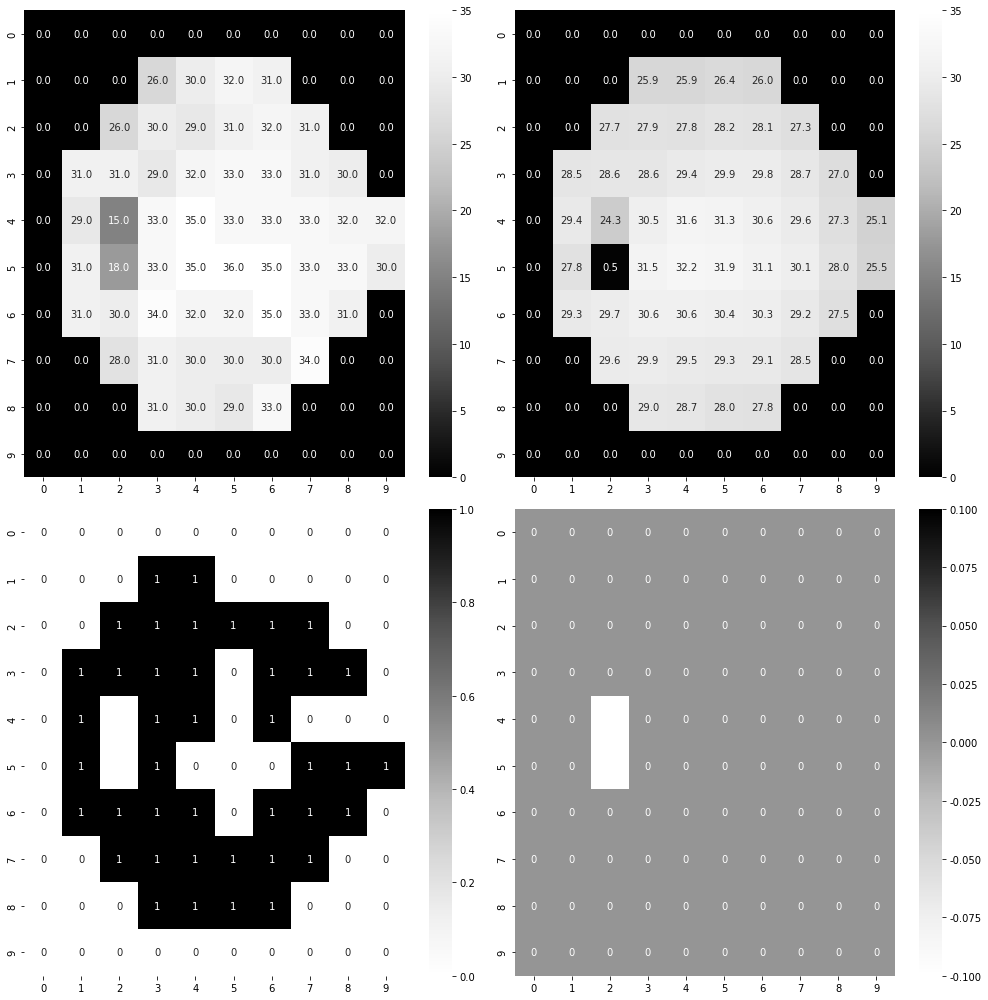

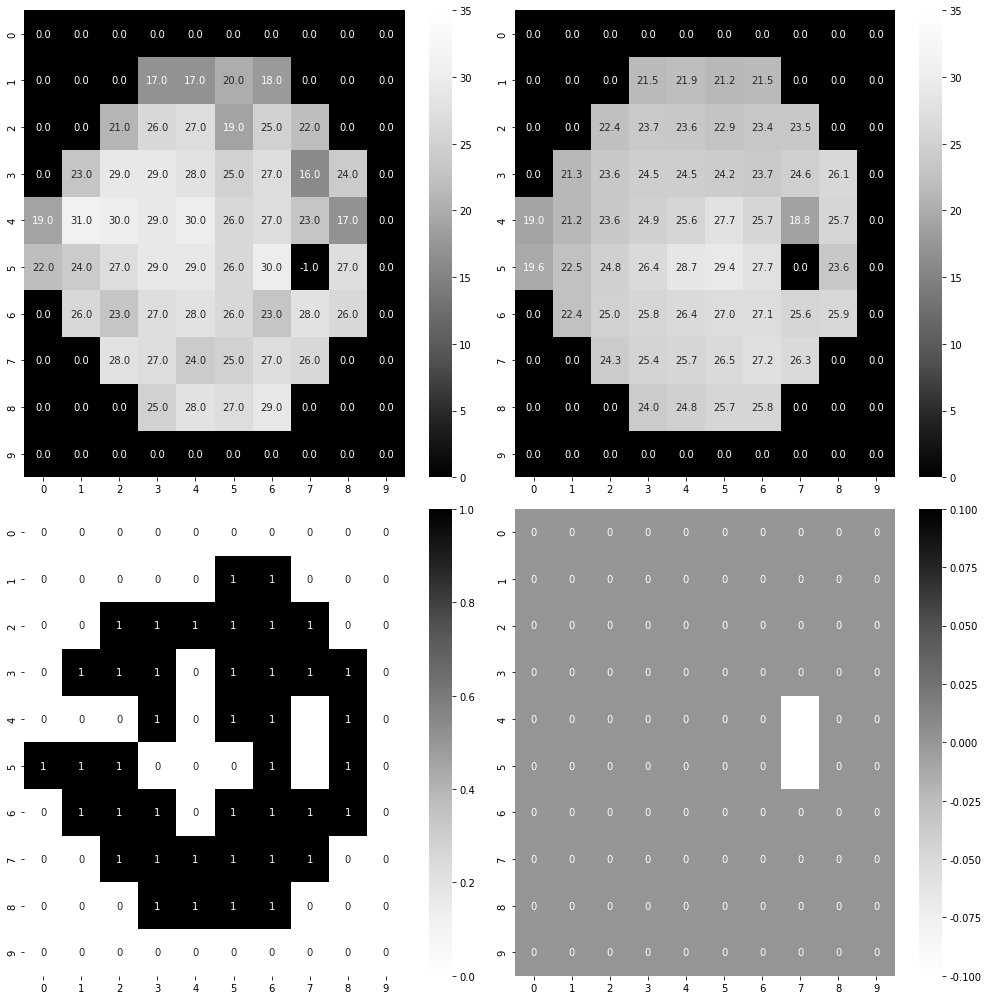

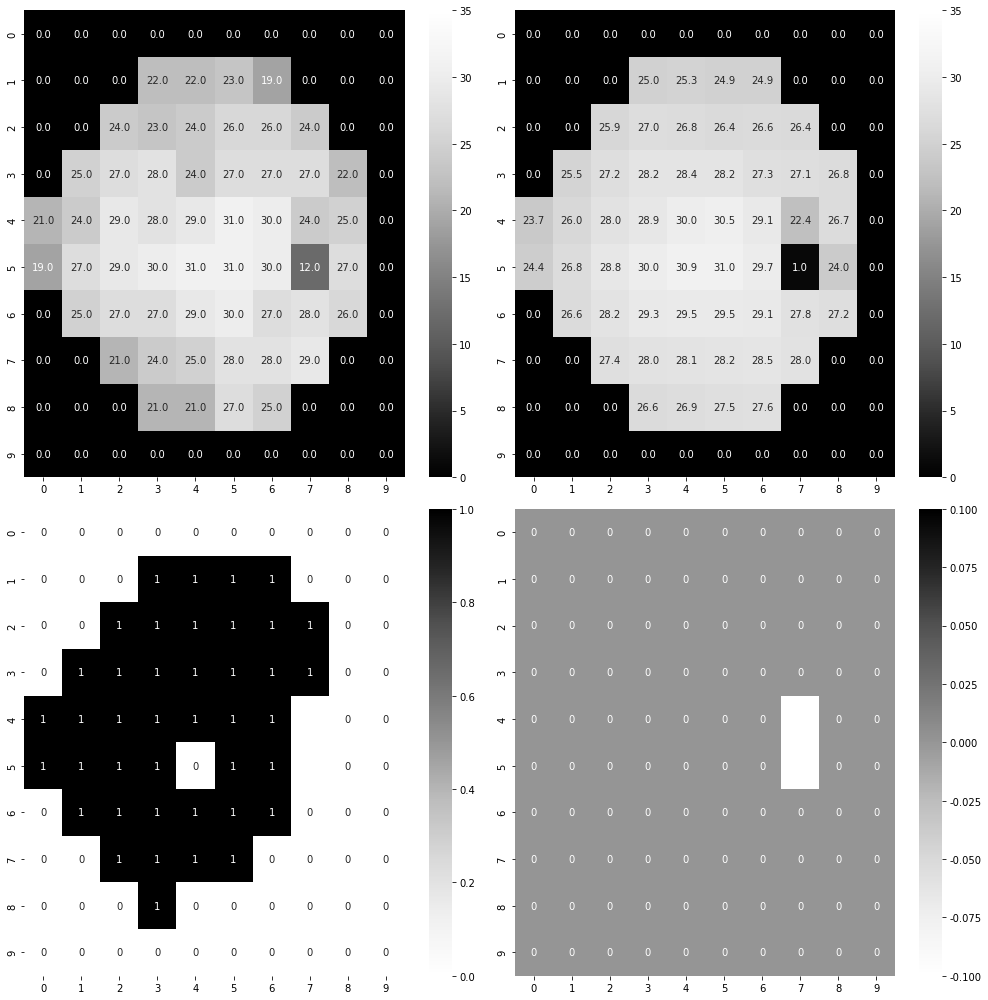

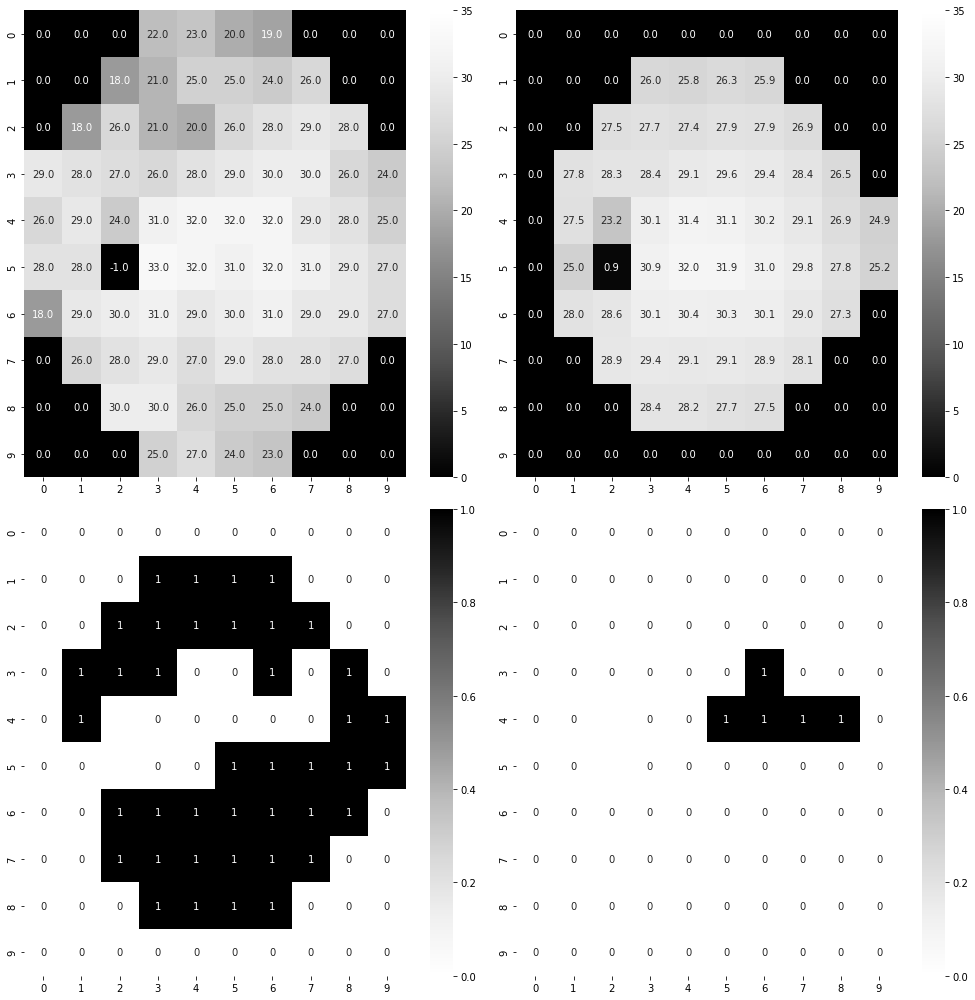

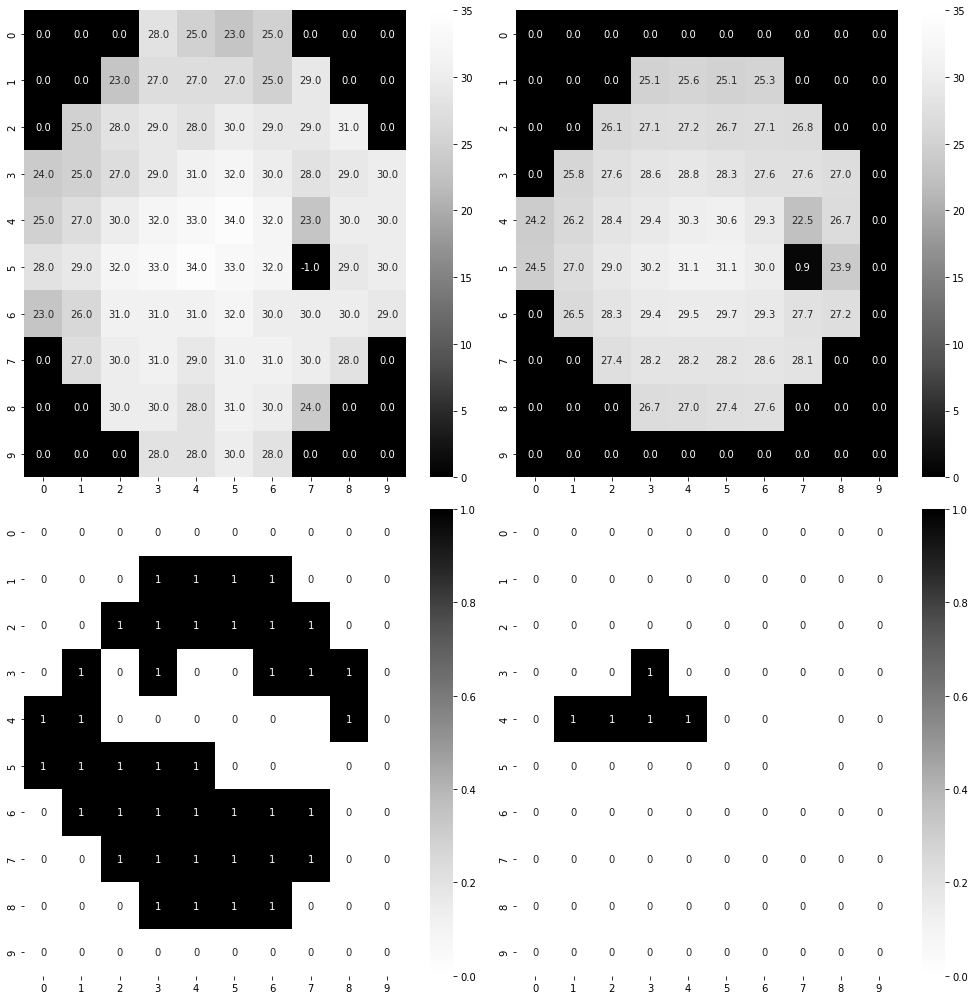

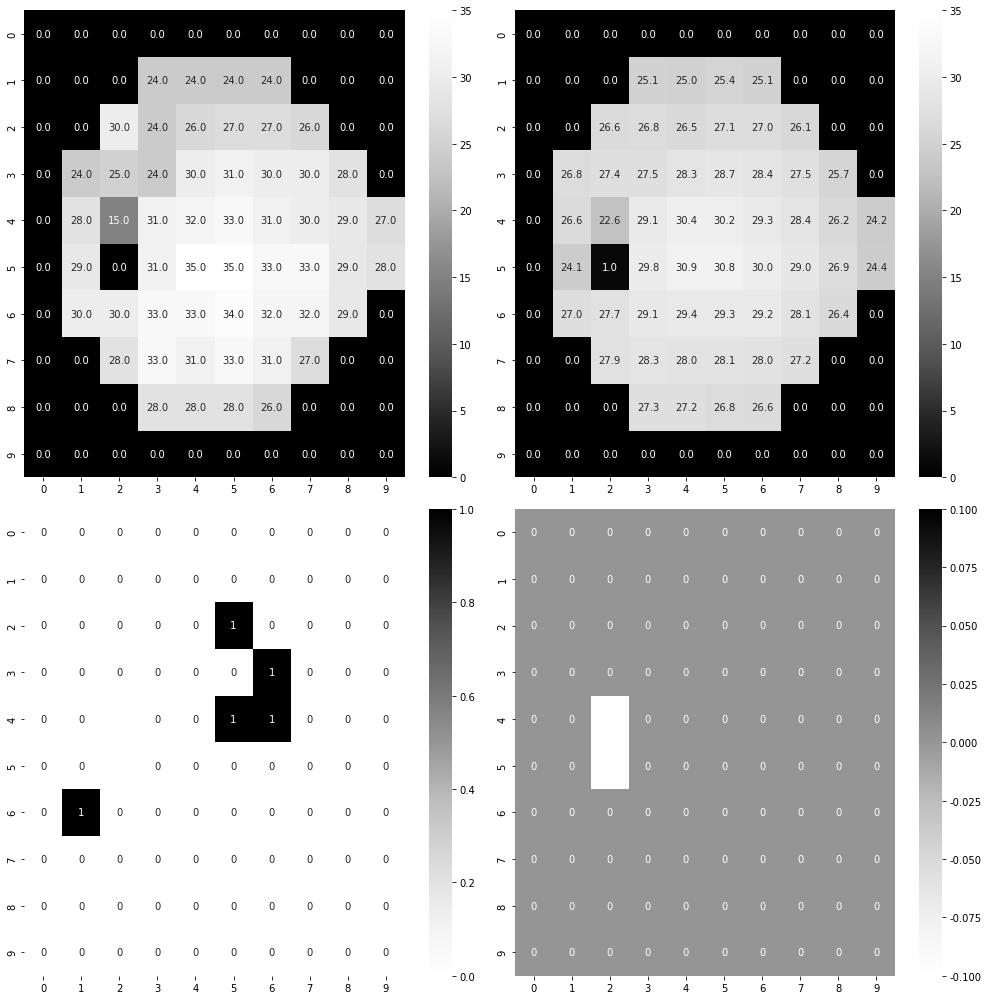

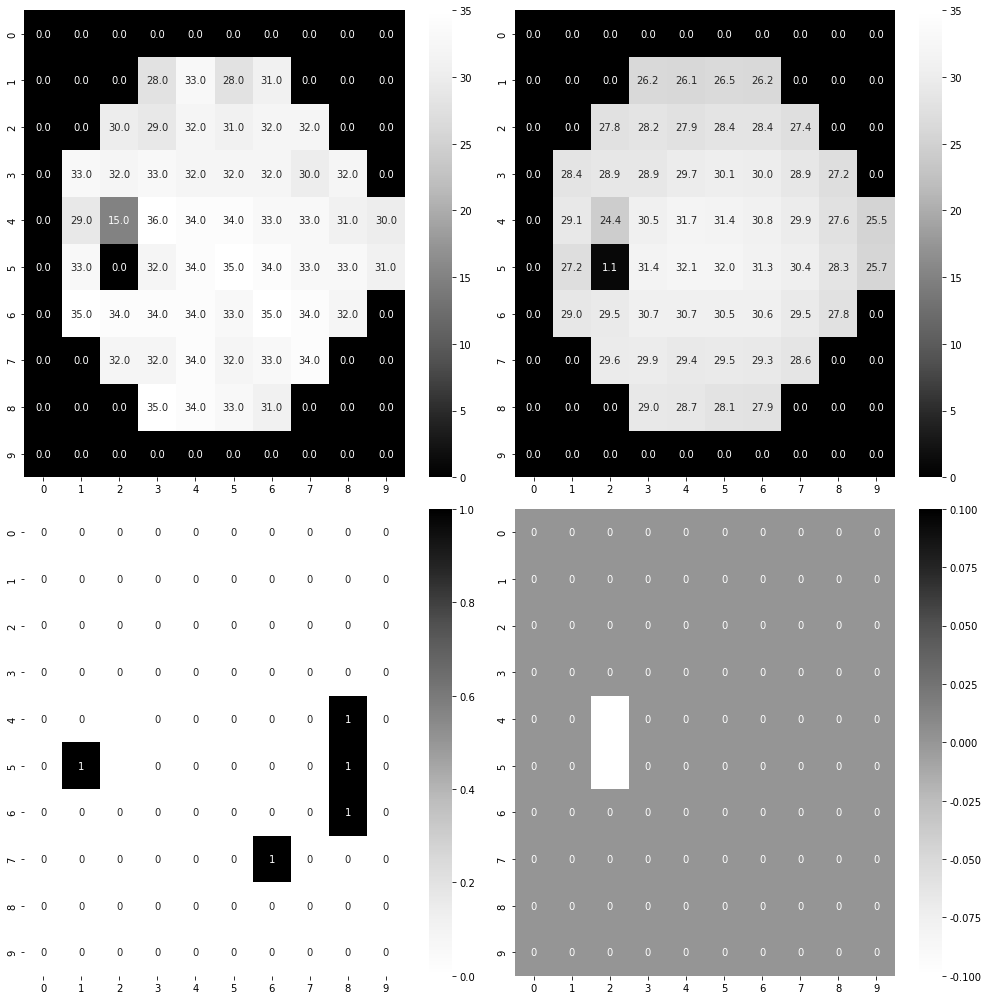

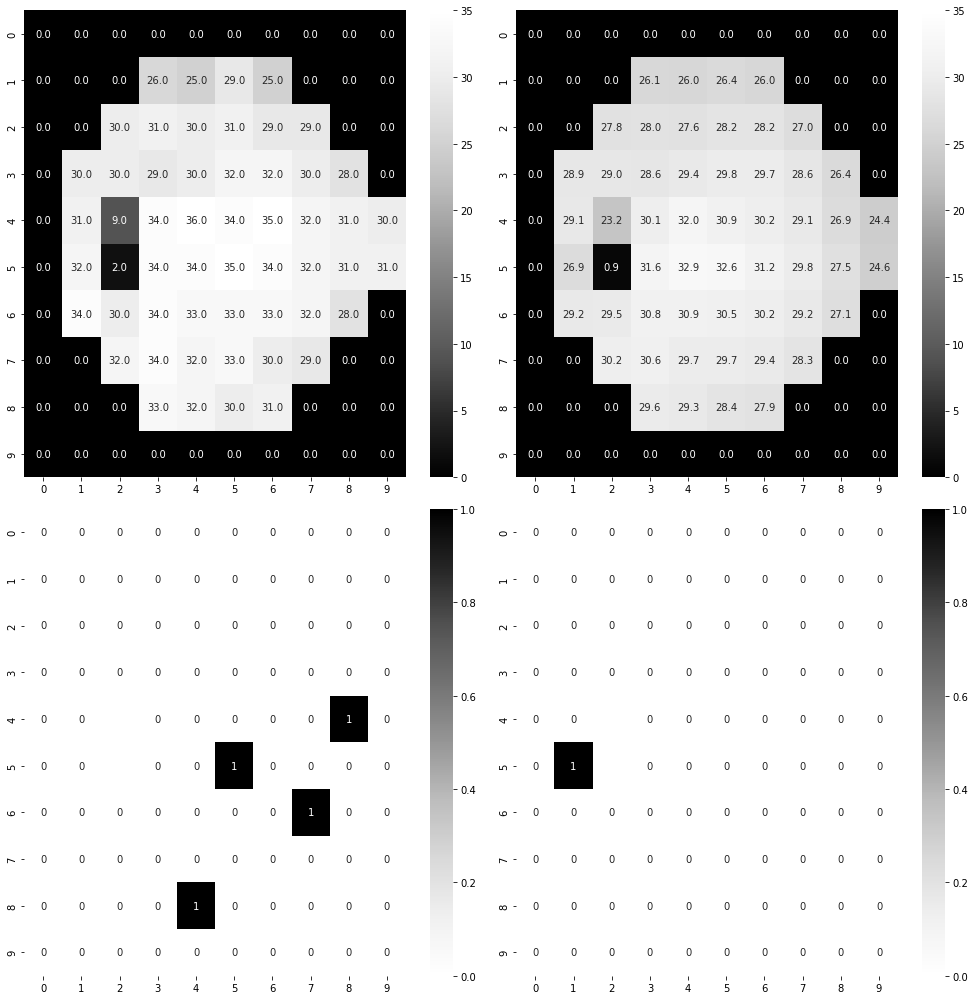

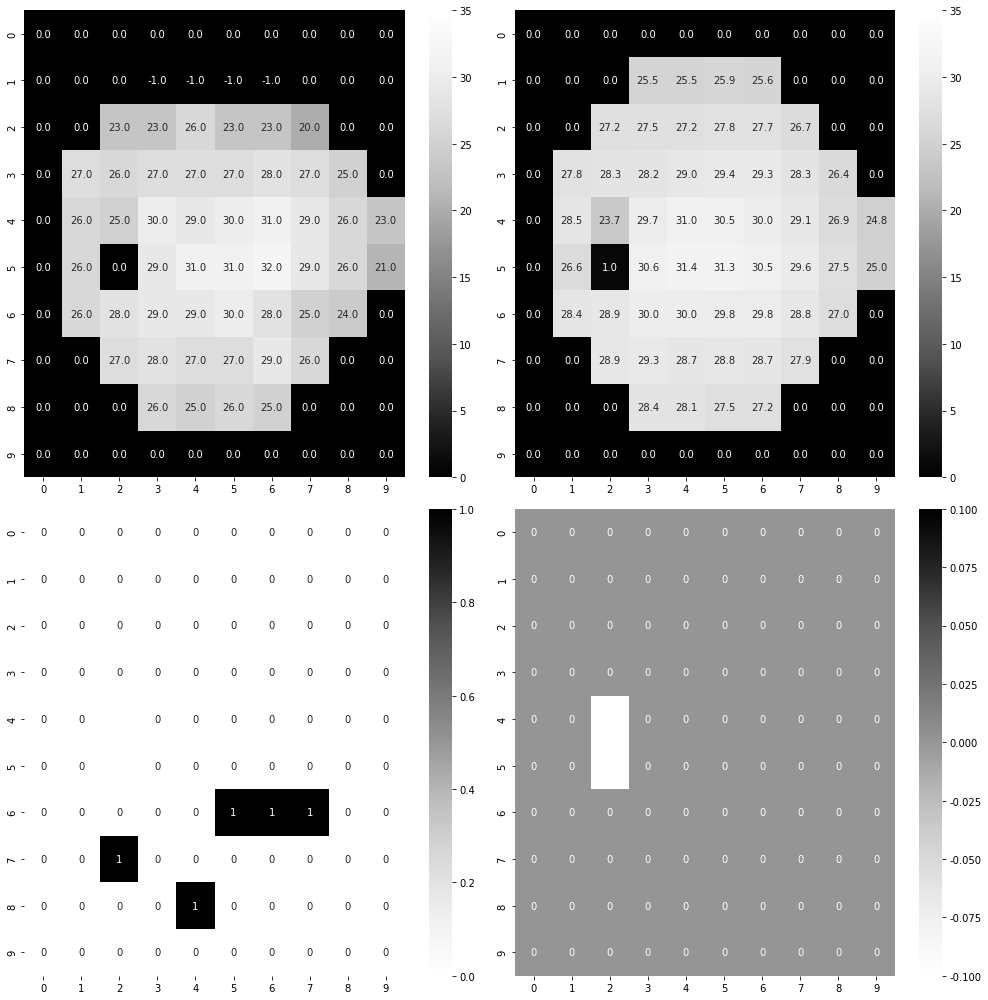

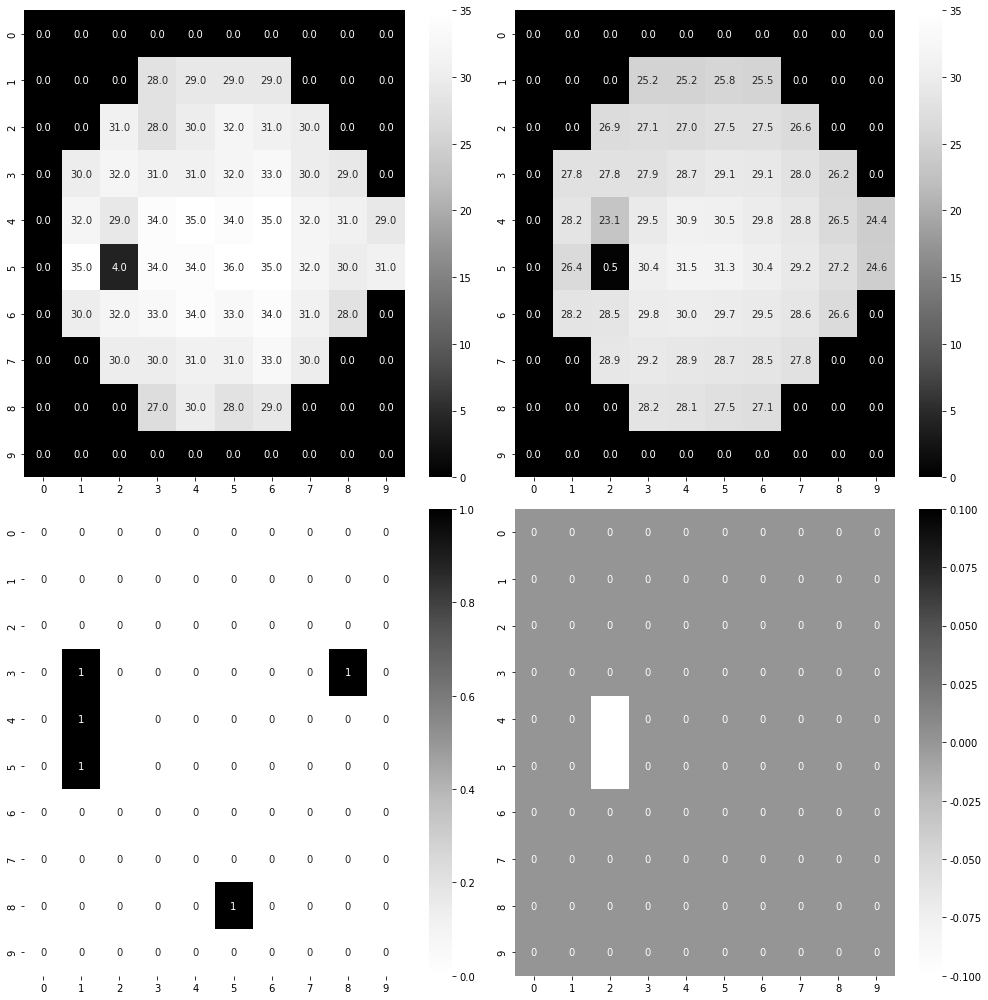

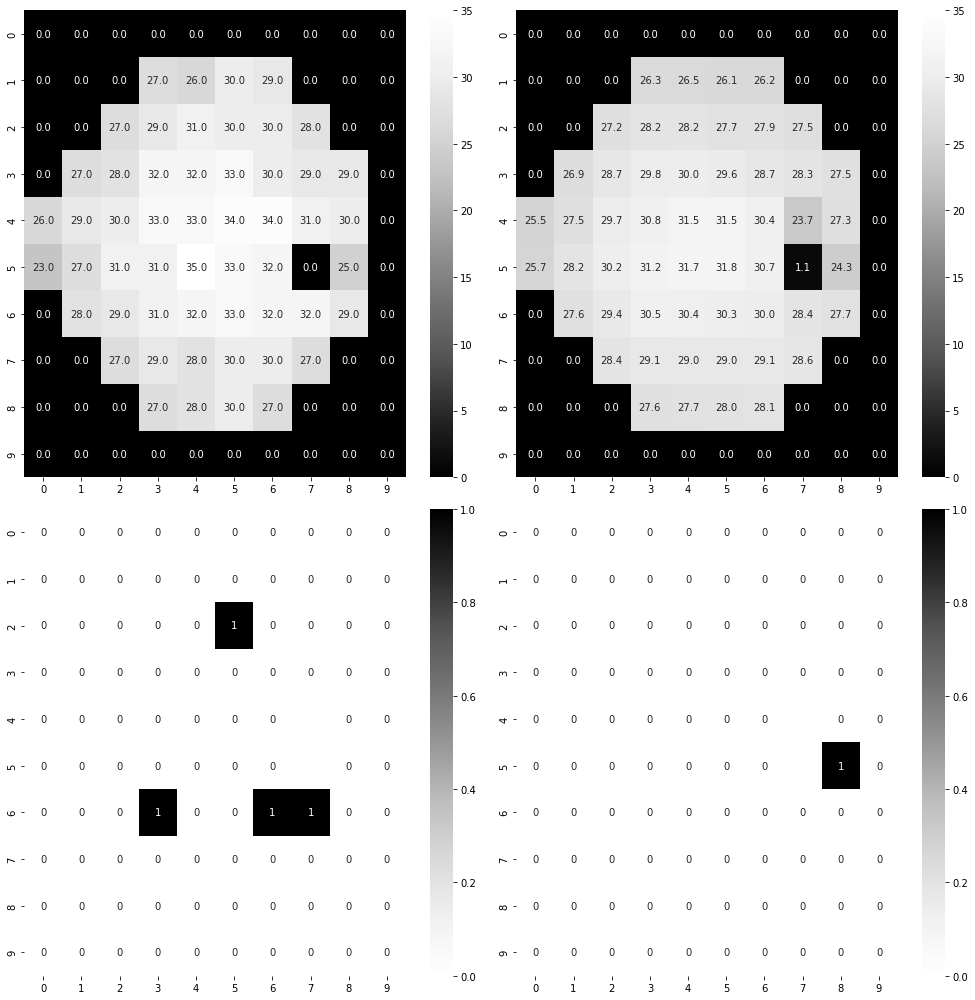

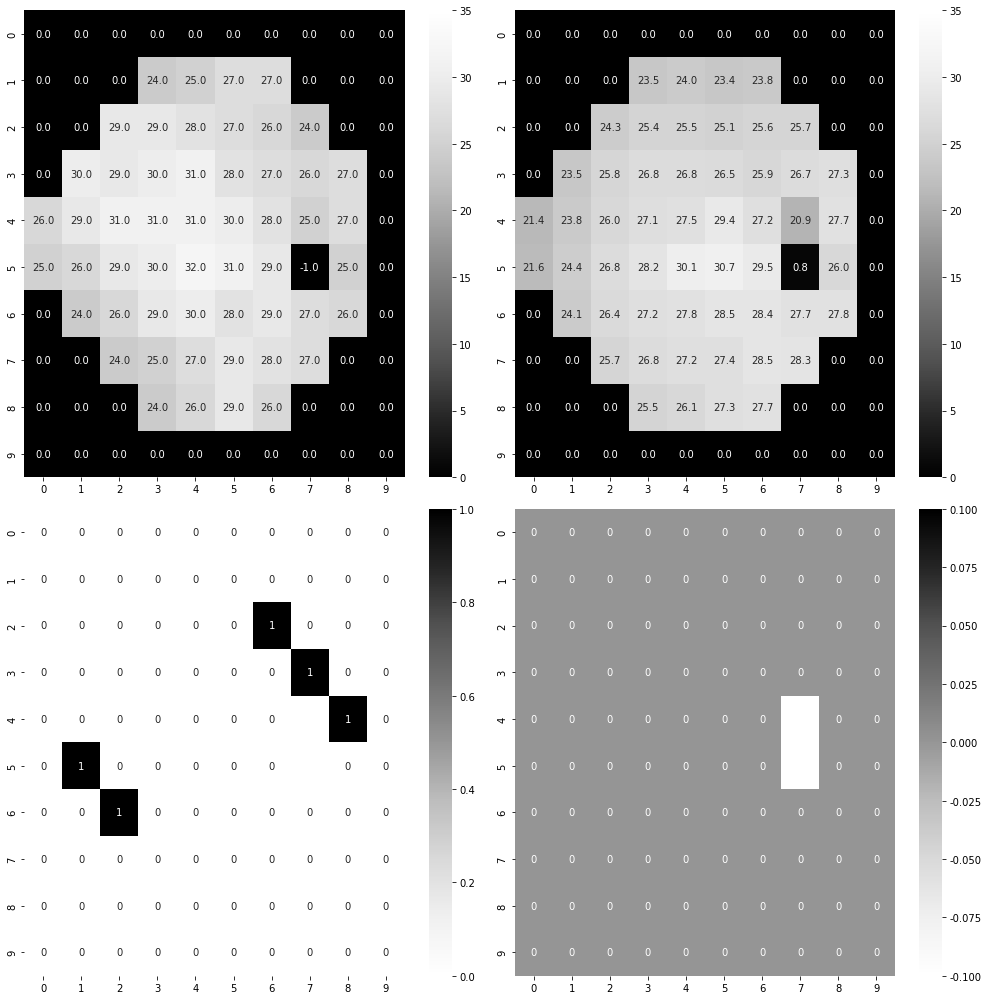

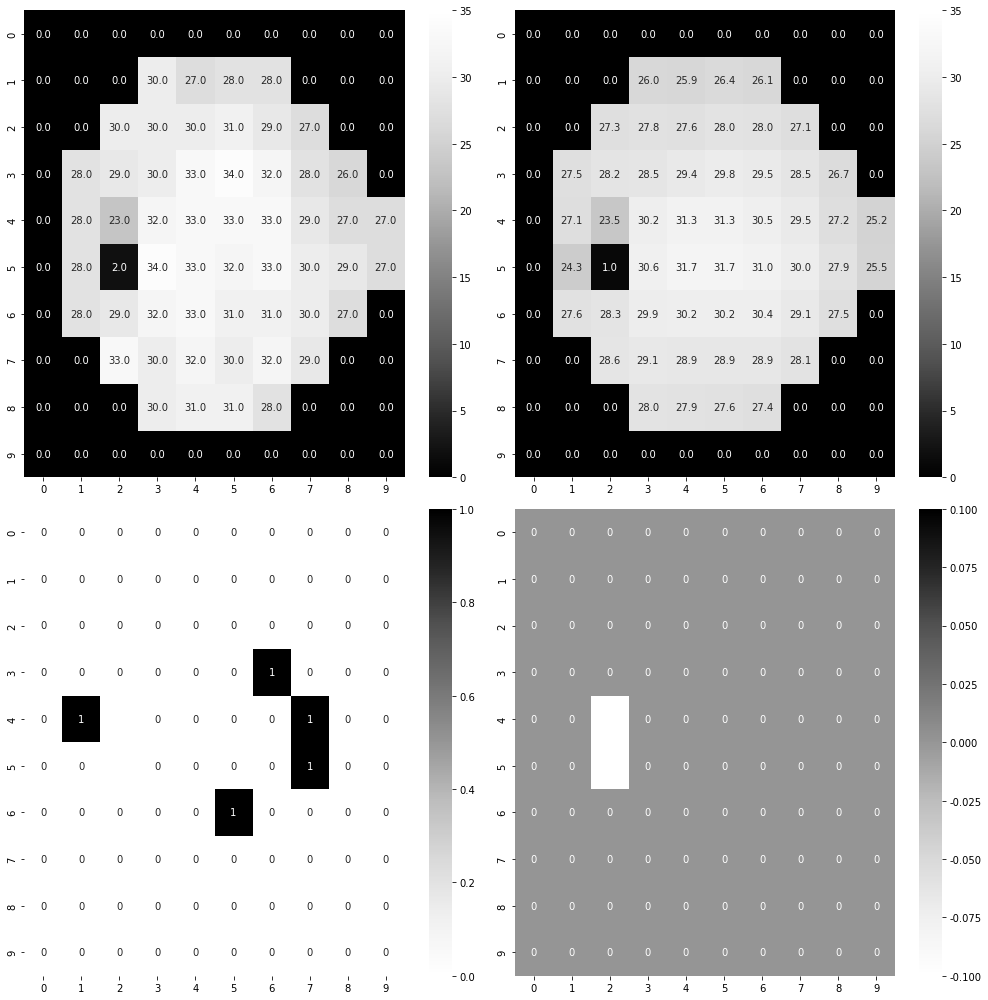

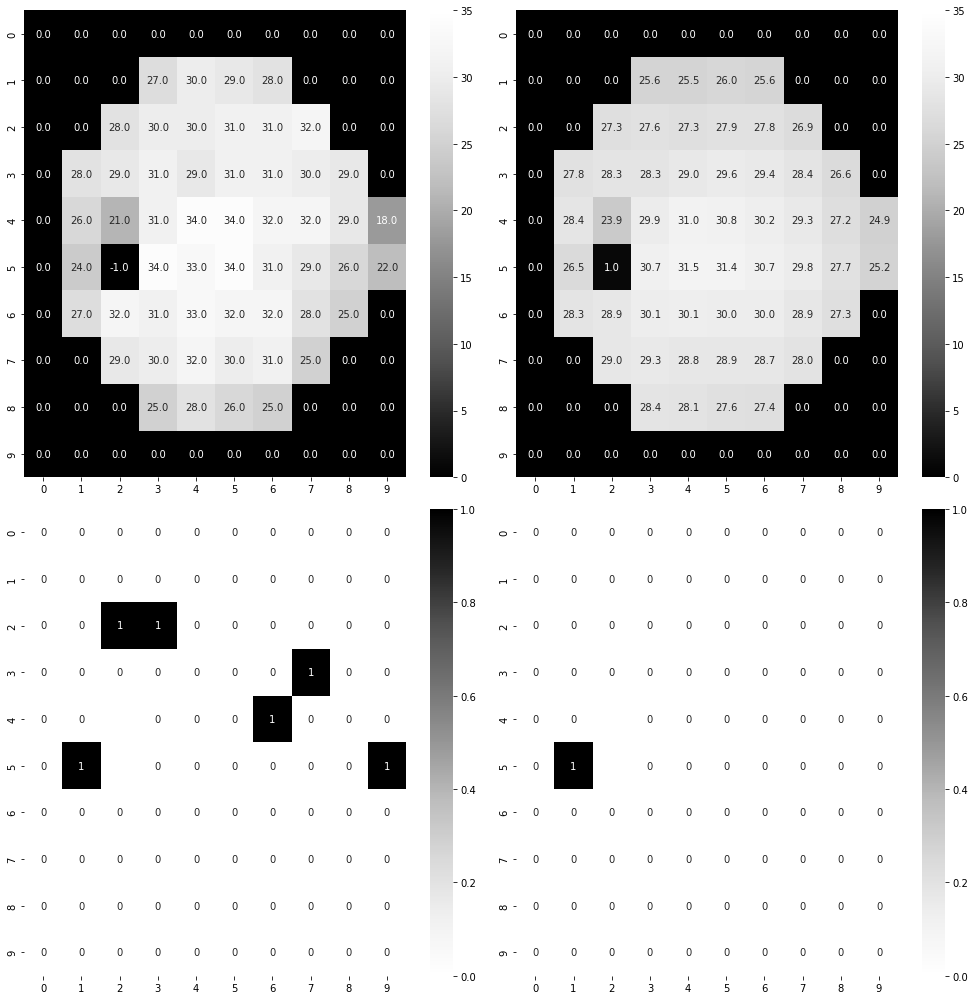

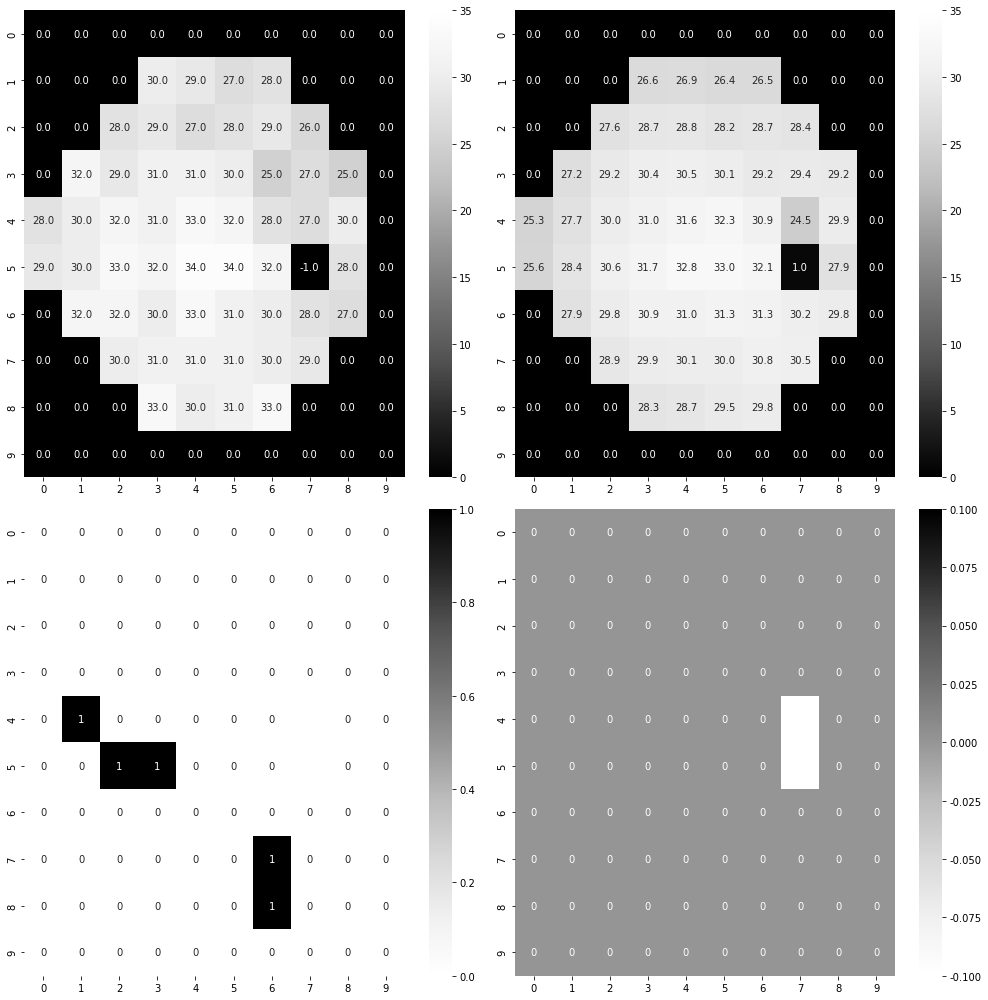

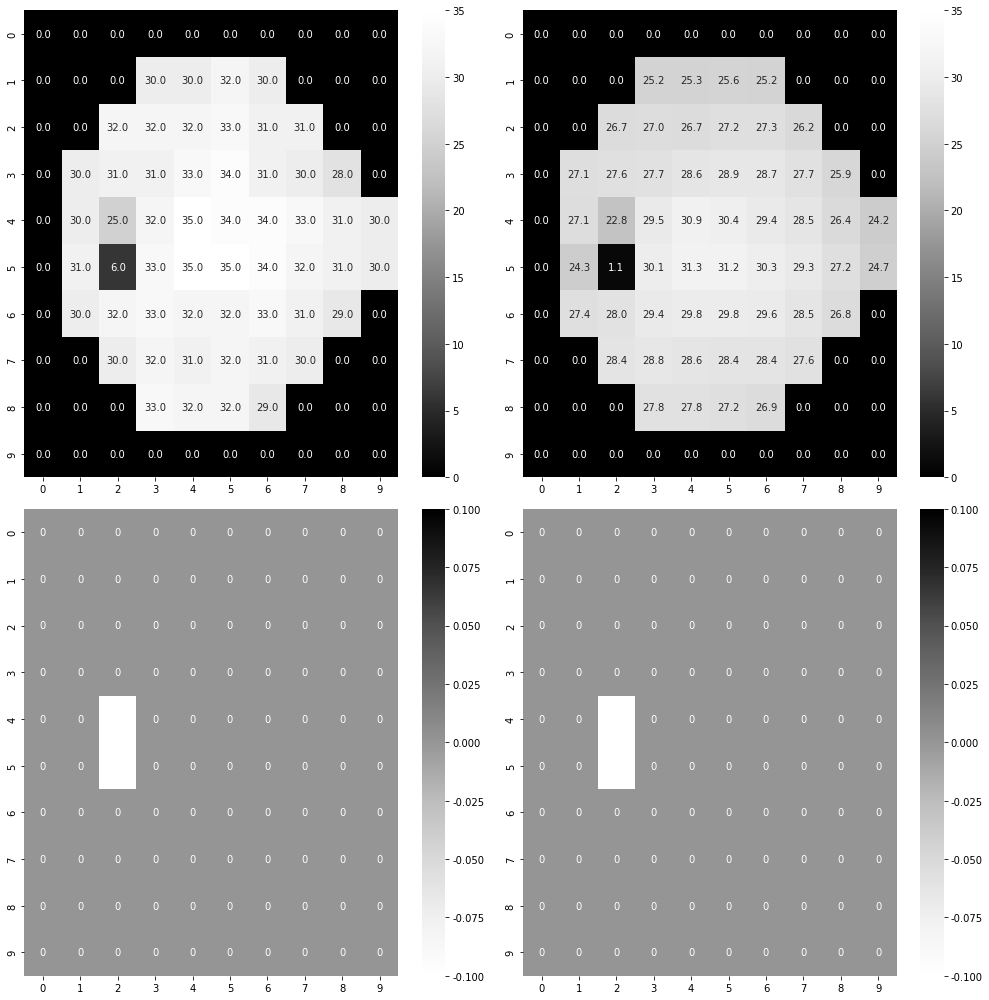

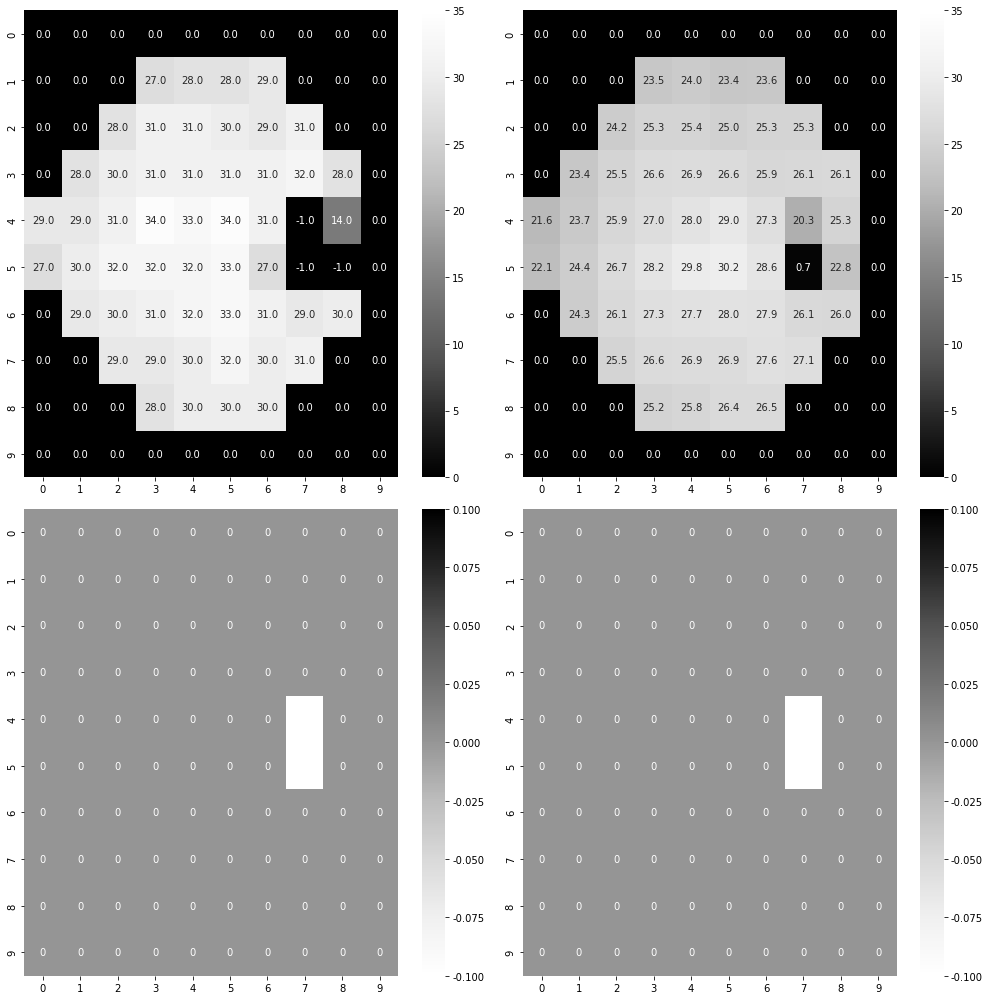

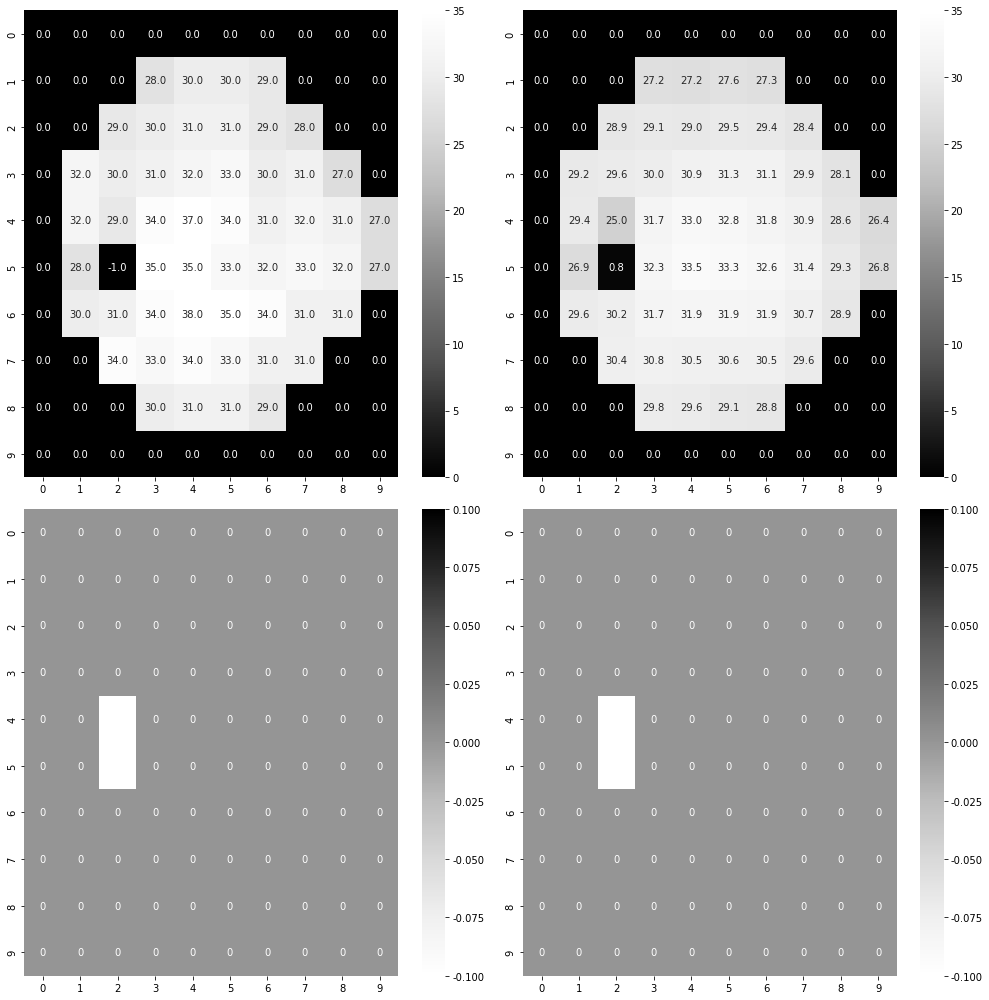

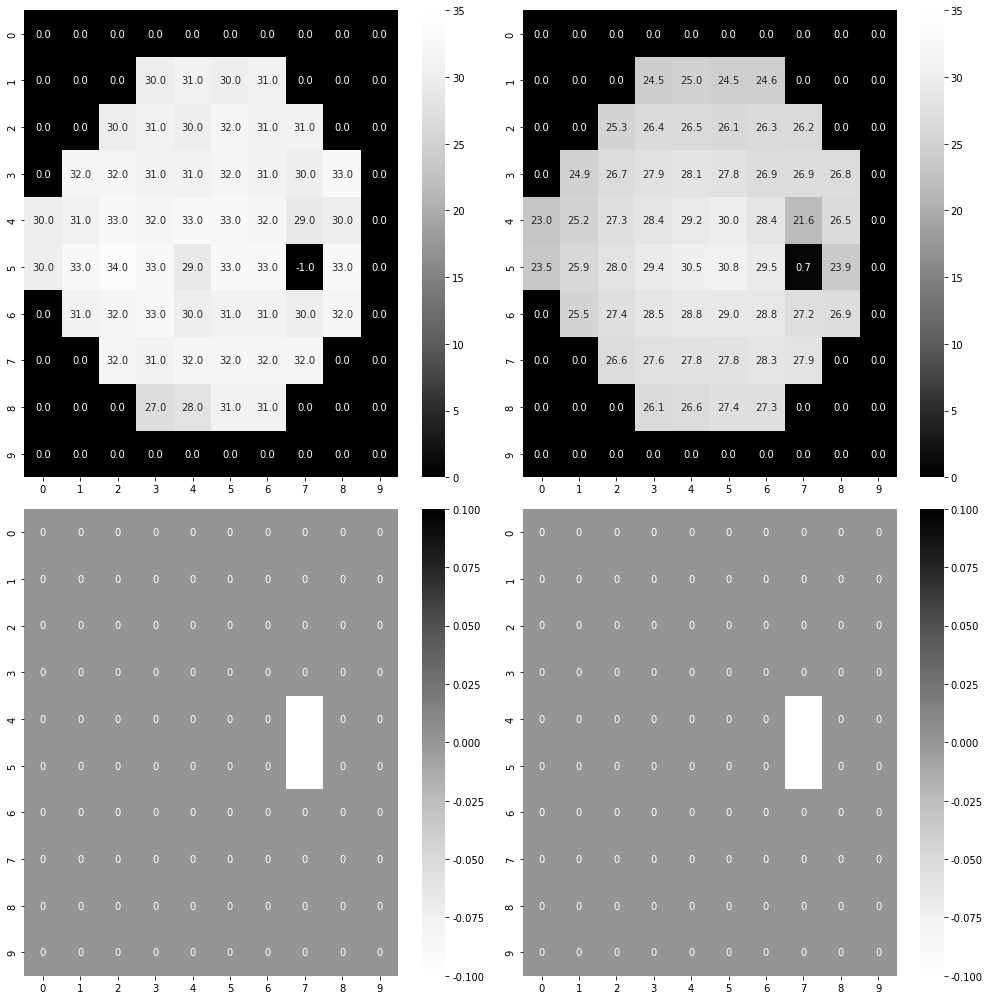

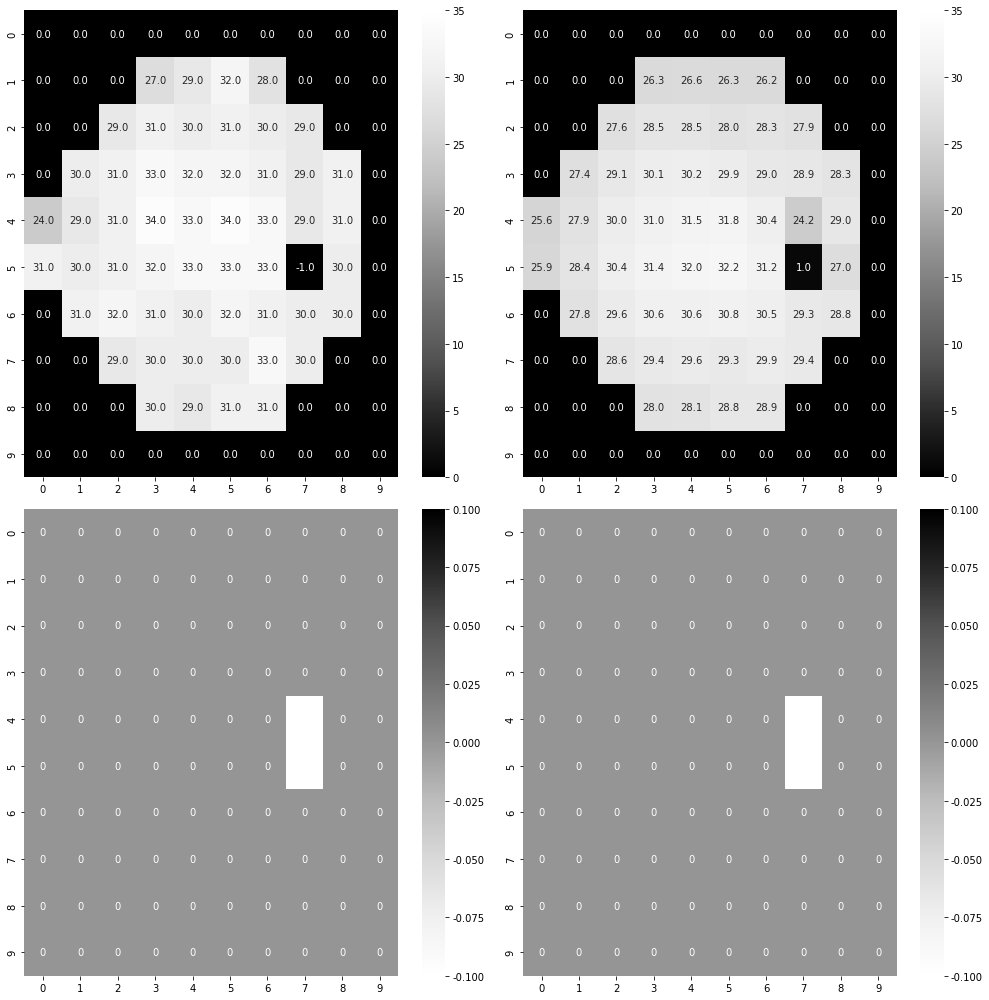

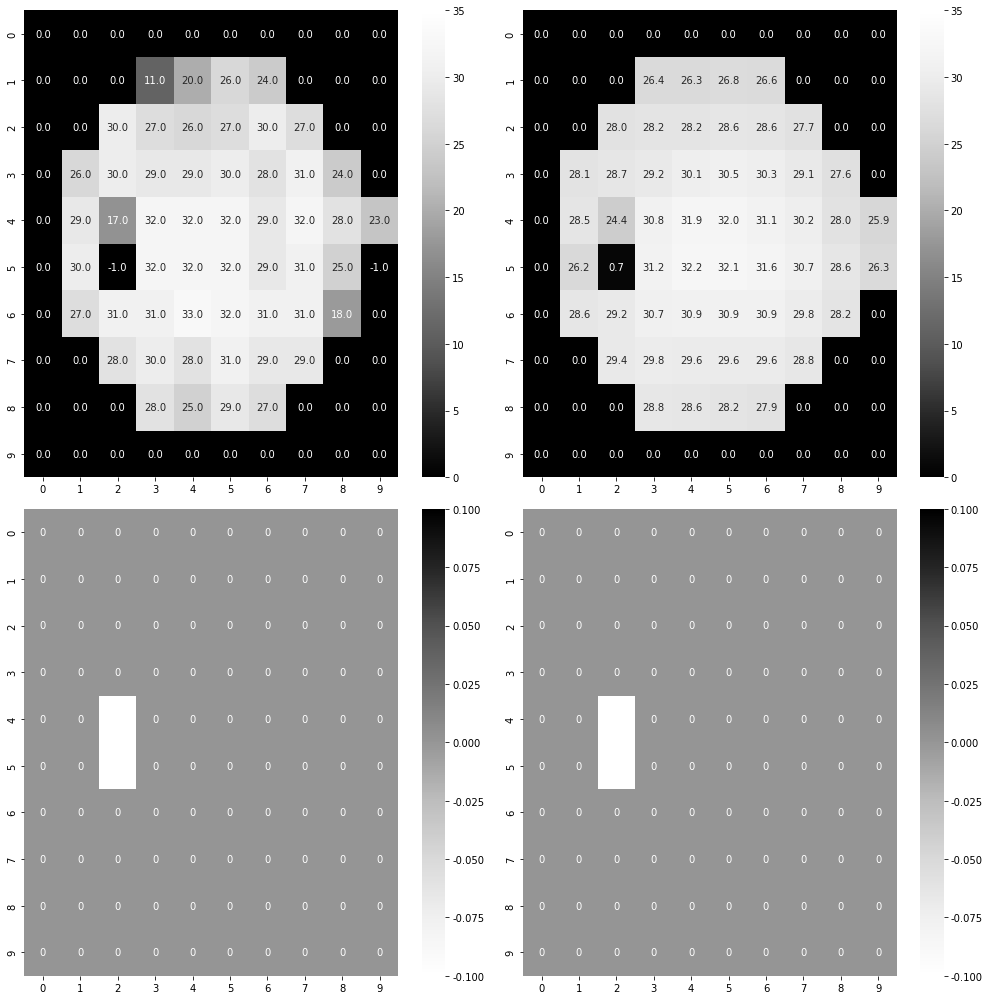

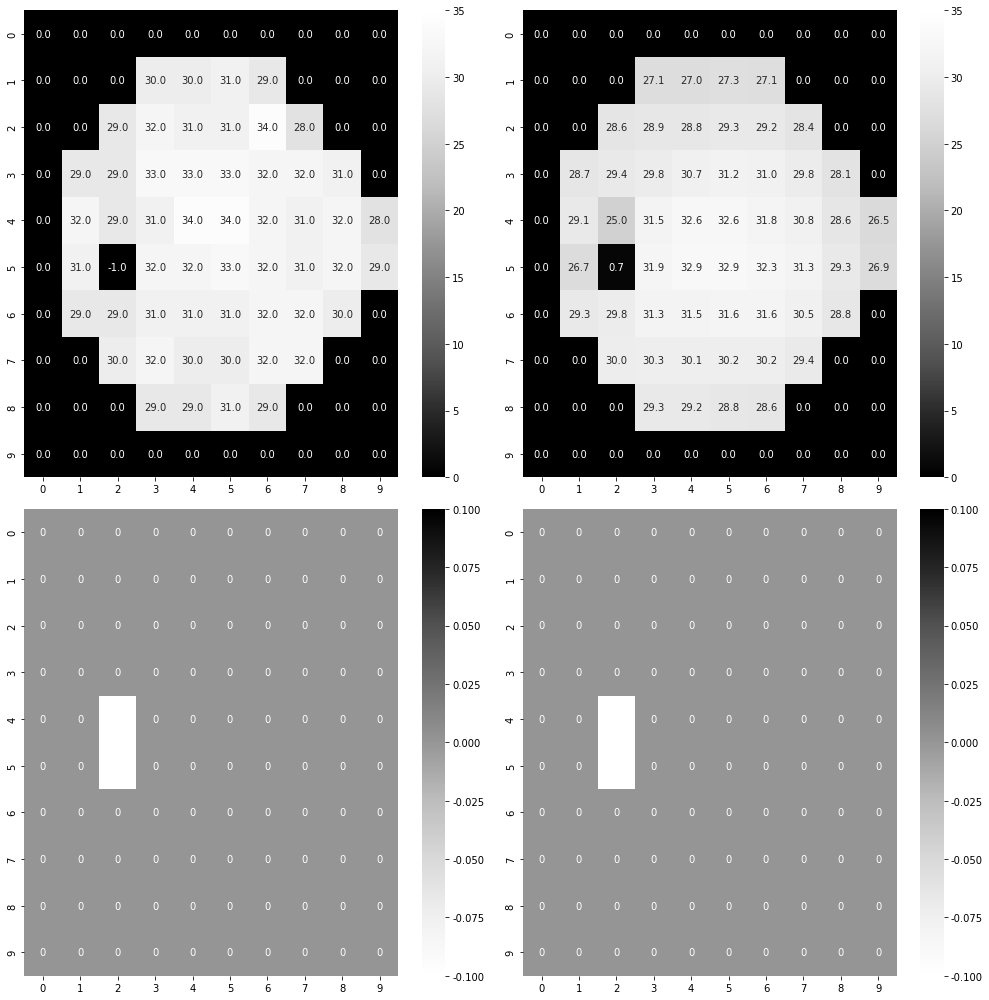

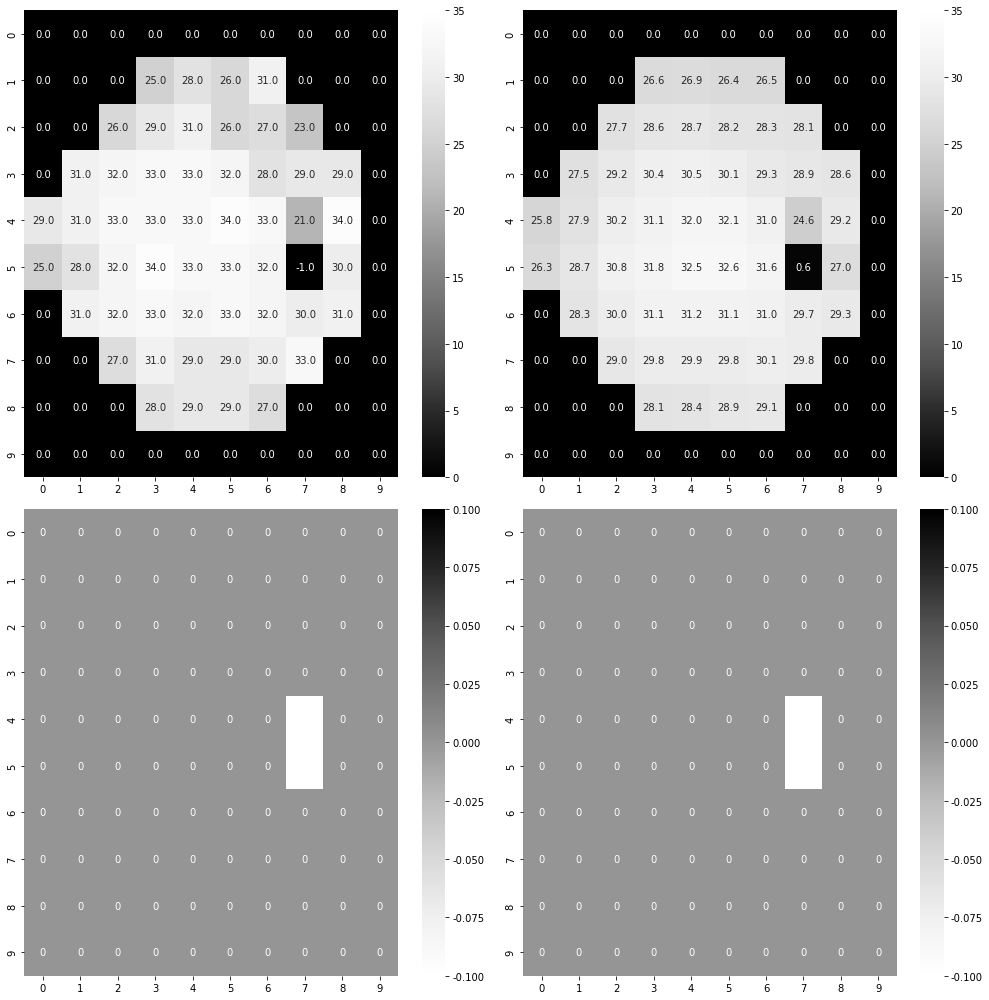

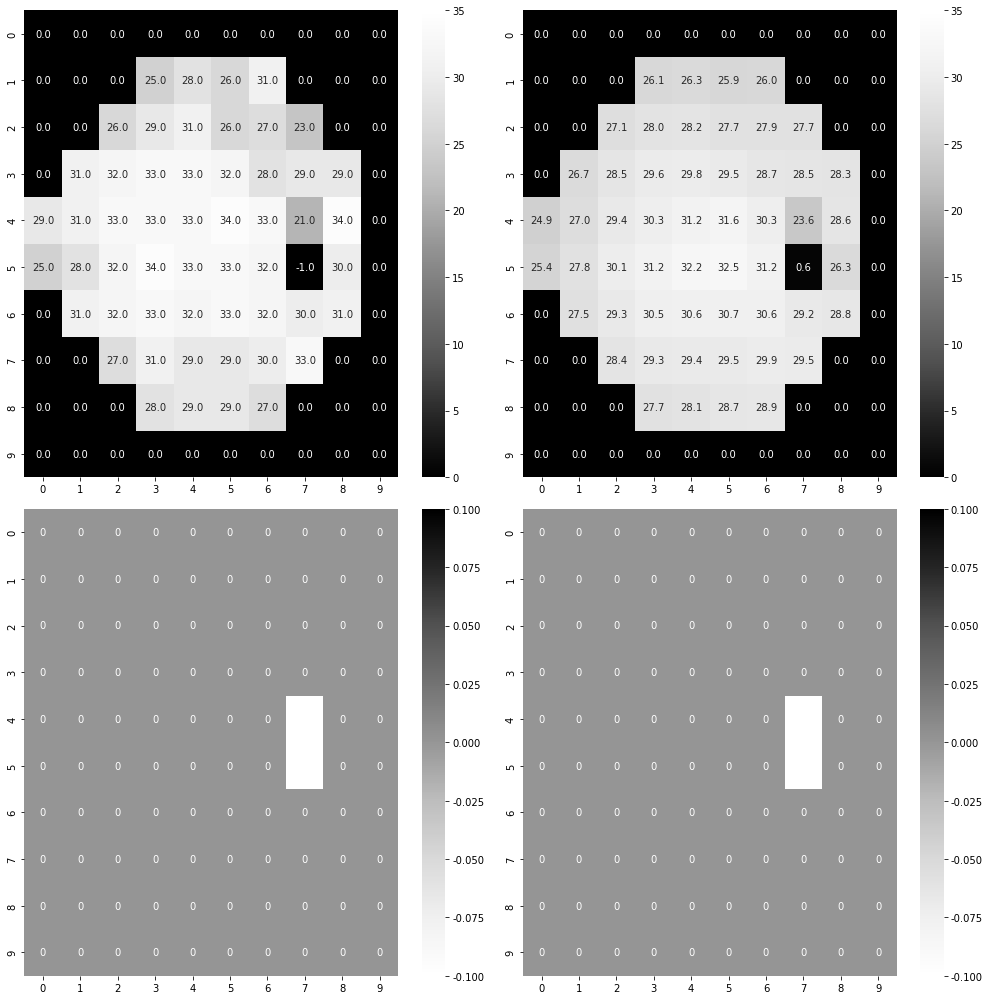

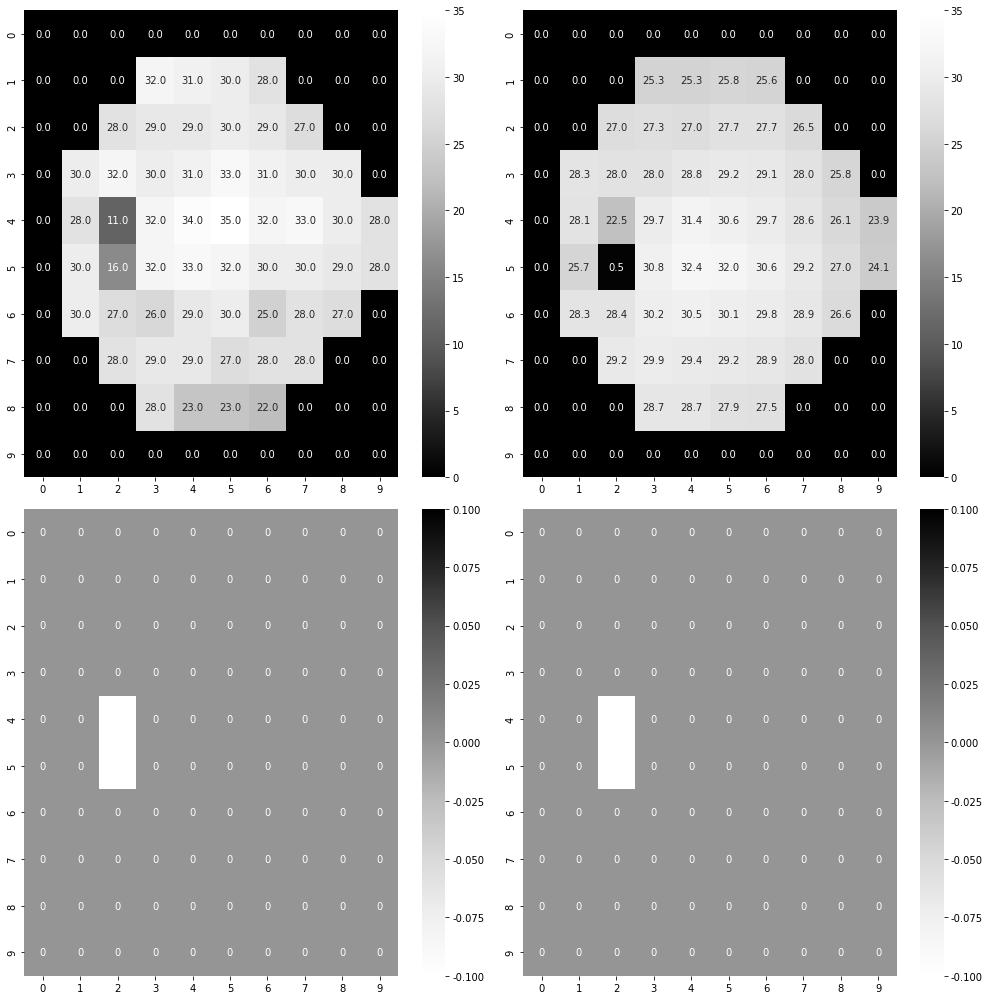

In [15]:
save_results(test_data)

In [12]:

def heatmap(data, ax=None,cbar_kw={}, **kwargs):
    if not ax:
        ax = plt.gca()
    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.


    kw = dict(color = "r" ,
              horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [13]:
def show_results(data:pd.DataFrame,show_id=1):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
    ax=[ax1,ax2,ax3,ax4]
    draw_list= ['num', 'pred', 'classification_num','classification_pred']
    for i,j in zip(draw_list,ax):
        im, _ = heatmap(str_to_np_mat(test_data.iloc[show_id][i]), ax=j,cmap="Greys_r")
        annotate_heatmap(im, valfmt="{x:.1f} ")
    
    plt.tight_layout()
    plt.show()


In [15]:
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/home/octusr3/simhei.ttf')
 
def draw():
    #定义热图的横纵坐标
    xLabel = ['A','B','C','D','E']
    yLabel = ['1','2','3','4','5']
 
    #准备数据阶段，利用random生成二维数据（5*5）
    data = []
    for i in range(5):
        temp = []
        for j in range(5):
            k = random.randint(0,100)
            temp.append(k)
        data.append(temp)
 
    #作图阶段
    fig = plt.figure()
    #定义画布为1*1个划分，并在第1个位置上进行作图
    ax = fig.add_subplot(111)
    #定义横纵坐标的刻度
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel, fontproperties=font)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    #作图并选择热图的颜色填充风格，这里选择hot
    #im = ax.imshow(data), cmap=plt.cm.G_r)
    #增加右侧的颜色刻度条
    #plt.colorbar(im)
    #增加标题
    #plt.title("This is a title", fontproperties=font)
    #show
    plt.show()
 
d = draw()

SyntaxError: invalid syntax (<ipython-input-15-e5d91f8aff5e>, line 32)

In [ ]:
import matplotlib    
print(matplotlib.matplotlib_fname())

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
matplotlib.get_cachedir()

'/home/octusr3/.cache/matplotlib'

In [ ]:
#回归图和Bland-Altman图，这两个分别看相关性和一致性,PCC图

#好的，你画一下回归图和Bland-Altman图，这两个分别看相关性和一致性,PCC图